In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import plotly.express as px 
from scipy.fftpack import fft 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
import seaborn as sns

from tensorflow.keras import Sequential
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers
from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector
from keras.models import Model
from keras.layers.recurrent import GRU


# Dynamic Pressure

In [2]:
Normal_DP=pd.read_csv("Normal_DP.csv")

In [3]:
Normal_DP=Normal_DP.drop(columns=['Unnamed: 0'])
Normal_DP

,Time,P out bar,P in bar,Q L/M,Dynamic Pressure,H
0,0.000000,1.161289,-0.084085,49.443383,-0.002651,1.245374
1,0.000098,1.161289,-0.084085,49.443383,-0.004067,1.245374
2,0.000195,1.161289,-0.084085,49.443383,-0.003631,1.245374
3,0.000293,1.161289,-0.084085,49.443383,-0.010969,1.245374
4,0.000391,1.161289,-0.084085,49.443383,-0.002324,1.245374
...,...,...,...,...,...,...
919995,89.843262,0.593152,-0.090887,49.371344,0.018307,0.684039
919996,89.843359,0.593152,-0.090887,49.371344,0.026480,0.684039
919997,89.843457,0.593152,-0.090887,49.371344,0.018162,0.684039
919998,89.843555,0.593152,-0.090887,49.371344,0.021976,0.684039


In [4]:
Normal_DPx=Normal_DP
Normal_DP=Normal_DPx.drop(columns=['Time '])
Normal_DP

,P out bar,P in bar,Q L/M,Dynamic Pressure,H
0,1.161289,-0.084085,49.443383,-0.002651,1.245374
1,1.161289,-0.084085,49.443383,-0.004067,1.245374
2,1.161289,-0.084085,49.443383,-0.003631,1.245374
3,1.161289,-0.084085,49.443383,-0.010969,1.245374
4,1.161289,-0.084085,49.443383,-0.002324,1.245374
...,...,...,...,...,...
919995,0.593152,-0.090887,49.371344,0.018307,0.684039
919996,0.593152,-0.090887,49.371344,0.026480,0.684039
919997,0.593152,-0.090887,49.371344,0.018162,0.684039
919998,0.593152,-0.090887,49.371344,0.021976,0.684039


In [5]:
#Normalizing the data
for col in Normal_DP:
    Normal_DP[col] = (Normal_DP[col]-Normal_DP[col].min())/(Normal_DP[col].max()-Normal_DP[col].min())

In [6]:
Cavitation_DP=pd.read_csv("Cavitation_DP.csv")
Cavitation_DP=Cavitation_DP.drop(columns=['Unnamed: 0'])
Cavitation_DP

,Time,P out bar,P in bar,Q L/M,Dynamic Pressure,H
0,0.000000,0.165204,-0.616328,27.839285,0.024410,0.781532
1,0.000098,0.371800,-0.616328,27.839285,0.018997,0.988128
2,0.000195,0.371800,-0.616328,27.839285,0.016745,0.988128
3,0.000293,0.371800,-0.616328,27.839285,0.022920,0.988128
4,0.000391,0.371800,-0.616328,27.839285,0.010825,0.988128
...,...,...,...,...,...,...
1048571,102.399512,0.215623,-0.624159,27.789128,0.019324,0.839782
1048572,102.399609,0.215623,-0.624159,27.789128,0.009372,0.839782
1048573,102.399707,0.215623,-0.624159,27.789128,0.013077,0.839782
1048574,102.399805,0.215623,-0.624159,27.789128,0.018344,0.839782


In [7]:
Cavitation_DPx=Cavitation_DP
Cavitation_DP=Cavitation_DP.drop(columns=['Time '])
Cavitation_DP

,P out bar,P in bar,Q L/M,Dynamic Pressure,H
0,0.165204,-0.616328,27.839285,0.024410,0.781532
1,0.371800,-0.616328,27.839285,0.018997,0.988128
2,0.371800,-0.616328,27.839285,0.016745,0.988128
3,0.371800,-0.616328,27.839285,0.022920,0.988128
4,0.371800,-0.616328,27.839285,0.010825,0.988128
...,...,...,...,...,...
1048571,0.215623,-0.624159,27.789128,0.019324,0.839782
1048572,0.215623,-0.624159,27.789128,0.009372,0.839782
1048573,0.215623,-0.624159,27.789128,0.013077,0.839782
1048574,0.215623,-0.624159,27.789128,0.018344,0.839782


In [8]:
#Normalizing the data
for col in Cavitation_DP:
    Cavitation_DP[col] = (Cavitation_DP[col]-Cavitation_DP[col].min())/(Cavitation_DP[col].max()-Cavitation_DP[col].min())

In [9]:
scaler = StandardScaler()

scaler.fit(Normal_DP)
Normal_DP = scaler.transform(Normal_DP)

scaler.fit(Cavitation_DP)
Cavitation_DP = scaler.transform(Cavitation_DP)


In [10]:
df=Normal_DP
Cavdf=Cavitation_DP


In [11]:
df = pd.DataFrame(df, columns =[ 'P out bar', 'P in bar', 'Q  L/M', 'Dynamic Pressure','H'])
Cavdf = pd.DataFrame(Cavdf, columns =['P out bar', 'P in bar', 'Q  L/M', 'Dynamic Pressure','H'])


In [12]:
X_Norm = fft(df)
N = len(df)
n = np.arange(N)
sr = 1 / (60*60)
T = N/sr
freq = n/T 
# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

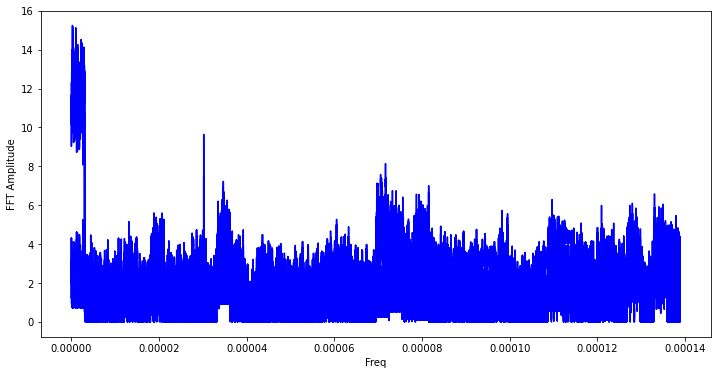

In [13]:
plt.figure(figsize = (12, 6))
plt.plot(f_oneside, np.abs(X_Norm[:n_oneside]), 'b')
plt.xlabel('Freq')
plt.ylabel('FFT Amplitude')
plt.show()

In [14]:
X_cav = fft(Cavdf)
N = len(Cavdf)
n = np.arange(N)
sr = 1 / (60*60)
T = N/sr
freq = n/T 
# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

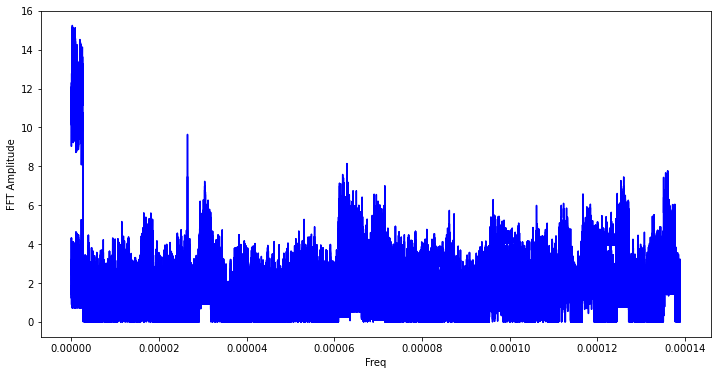

In [15]:
plt.figure(figsize = (12, 6))
plt.plot(f_oneside, np.abs(X_Norm[:n_oneside]), 'b')
plt.xlabel('Freq')
plt.ylabel('FFT Amplitude')
plt.show()

In [16]:
X_Norm = X_Norm.real.astype(np.float32)
X_cav = X_cav.real.astype(np.float32)

In [17]:
X_Norm = pd.DataFrame(X_Norm, columns =[ 'P out bar', 'P in bar', 'Q  L/M', 'Dynamic Pressure','H'])
X_cav = pd.DataFrame(X_cav, columns =[ 'P out bar', 'P in bar', 'Q  L/M', 'Dynamic Pressure','H'])

In [18]:
X_Norm['Time ']=Normal_DPx['Time ']
X_Norm

,P out bar,P in bar,Q L/M,Dynamic Pressure,H,Time
0,10.949224,9.380308,-0.025825,-0.025825,9.380308,0.000000
1,10.869041,9.445177,-0.050602,-0.050602,9.445177,0.000098
2,10.893730,9.425203,-0.042973,-0.042973,9.425203,0.000195
3,10.478212,9.761365,-0.171375,-0.171375,9.761365,0.000293
4,10.967740,9.365328,-0.020103,-0.020103,9.365328,0.000391
...,...,...,...,...,...,...
919995,-1.114366,1.159629,0.496483,0.496483,1.159629,89.843262
919996,-0.651565,0.785215,0.639496,0.639496,0.785215,89.843359
919997,-1.122577,1.166271,0.493945,0.493945,1.166271,89.843457
919998,-0.906607,0.991548,0.560684,0.560684,0.991548,89.843555


In [19]:
X_cav['Time ']=Cavitation_DPx['Time ']
X_cav

,P out bar,P in bar,Q L/M,Dynamic Pressure,H,Time
0,2.654498,-2.256242,-0.665647,-0.665647,-2.256242,0.000000
1,6.477165,0.816141,-0.389844,-0.389844,0.816141,0.000098
2,6.314395,0.947824,-0.440142,-0.440142,0.947824,0.000195
3,6.760710,0.586748,-0.302223,-0.302223,0.586748,0.000293
4,5.886511,1.293990,-0.572366,-0.572366,1.293990,0.000391
...,...,...,...,...,...,...
1048571,1.181810,-1.119986,0.218008,0.218008,-1.119986,102.399512
1048572,0.462503,-0.538054,-0.004271,-0.004271,-0.538054,102.399609
1048573,0.730292,-0.754700,0.078481,0.078481,-0.754700,102.399707
1048574,1.110978,-1.062682,0.196119,0.196119,-1.062682,102.399805


In [20]:
X_train=X_Norm

In [21]:
X_train

,P out bar,P in bar,Q L/M,Dynamic Pressure,H,Time
0,10.949224,9.380308,-0.025825,-0.025825,9.380308,0.000000
1,10.869041,9.445177,-0.050602,-0.050602,9.445177,0.000098
2,10.893730,9.425203,-0.042973,-0.042973,9.425203,0.000195
3,10.478212,9.761365,-0.171375,-0.171375,9.761365,0.000293
4,10.967740,9.365328,-0.020103,-0.020103,9.365328,0.000391
...,...,...,...,...,...,...
919995,-1.114366,1.159629,0.496483,0.496483,1.159629,89.843262
919996,-0.651565,0.785215,0.639496,0.639496,0.785215,89.843359
919997,-1.122577,1.166271,0.493945,0.493945,1.166271,89.843457
919998,-0.906607,0.991548,0.560684,0.560684,0.991548,89.843555


In [22]:
X_train=X_train.drop(columns=['Time '])

In [23]:
X_train=np.array(X_train)


In [24]:
timesteps=X_train.shape[0]
features=X_train.shape[1]


In [25]:
X_train.shape=(timesteps,features,1)
X_train.shape

(920000, 5, 1)

In [26]:
#Starting the LSTM model
model = keras.Sequential()

model.add(layers.GRU(25, activation='relu', return_sequences=True))
model.add(layers.BatchNormalization())

model.add(layers.GRU(5, activation='relu', return_sequences=False))
model.add(layers.BatchNormalization())

model.add(layers.RepeatVector(features))

model.add(layers.GRU(5, activation='relu', return_sequences=True))
model.add(layers.BatchNormalization())

model.add(layers.GRU(25, activation='relu', return_sequences=True))
model.add(layers.BatchNormalization())

model.add(layers.TimeDistributed(Dense(X_train.shape[2])))

model.compile(optimizer='adam', loss='mae')



In [27]:
X_test=X_cav

In [28]:
X_test=X_test.drop(columns=['Time '])

In [29]:
X_test.shape

(1048576, 5)

In [30]:
model.fit(X_train, X_train, epochs=150, batch_size=512, validation_data=(X_test, X_test))

Epoch 1/150
1797/1797 [==============================] - 35s 16ms/step - loss: 0.2725 - val_loss: 0.1498
Epoch 2/150
1797/1797 [==============================] - 31s 17ms/step - loss: 0.0944 - val_loss: 0.1120
Epoch 3/150
1797/1797 [==============================] - 29s 16ms/step - loss: 0.0866 - val_loss: 0.1109
Epoch 4/150
1797/1797 [==============================] - 32s 18ms/step - loss: 0.0835 - val_loss: 0.0940
Epoch 5/150
1797/1797 [==============================] - 30s 16ms/step - loss: 0.0812 - val_loss: 0.0843
Epoch 6/150
1797/1797 [==============================] - 33s 18ms/step - loss: 0.0781 - val_loss: 0.0730
Epoch 7/150
1797/1797 [==============================] - 30s 17ms/step - loss: 0.0777 - val_loss: 0.0999
Epoch 8/150
1797/1797 [==============================] - 30s 17ms/step - loss: 0.0764 - val_loss: 0.0859
Epoch 9/150
1797/1797 [==============================] - 30s 17ms/step - loss: 0.0748 - val_loss: 0.0775
Epoch 10/150
1797/1797 [==============================]

1797/1797 [==============================] - 31s 17ms/step - loss: 0.0479 - val_loss: 0.0601
Epoch 79/150
1797/1797 [==============================] - 30s 16ms/step - loss: 0.0469 - val_loss: 0.0704
Epoch 80/150
1797/1797 [==============================] - 31s 17ms/step - loss: 0.0470 - val_loss: 0.0758
Epoch 81/150
1797/1797 [==============================] - 30s 16ms/step - loss: 0.0474 - val_loss: 0.0642
Epoch 82/150
1797/1797 [==============================] - 31s 17ms/step - loss: 0.0465 - val_loss: 0.0838
Epoch 83/150
1797/1797 [==============================] - 30s 17ms/step - loss: 0.0486 - val_loss: 0.0705
Epoch 84/150
1797/1797 [==============================] - 31s 17ms/step - loss: 0.0473 - val_loss: 0.0683
Epoch 85/150
1797/1797 [==============================] - 30s 16ms/step - loss: 0.0461 - val_loss: 0.0635
Epoch 86/150
1797/1797 [==============================] - 31s 17ms/step - loss: 0.0465 - val_loss: 0.0943
Epoch 87/150
1797/1797 [==============================] - 3

In [31]:
X_pred = model.predict(X_train, verbose=1)

28750/28750 [==============================] - 61s 2ms/step


C:\Users\glowi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 1.0)

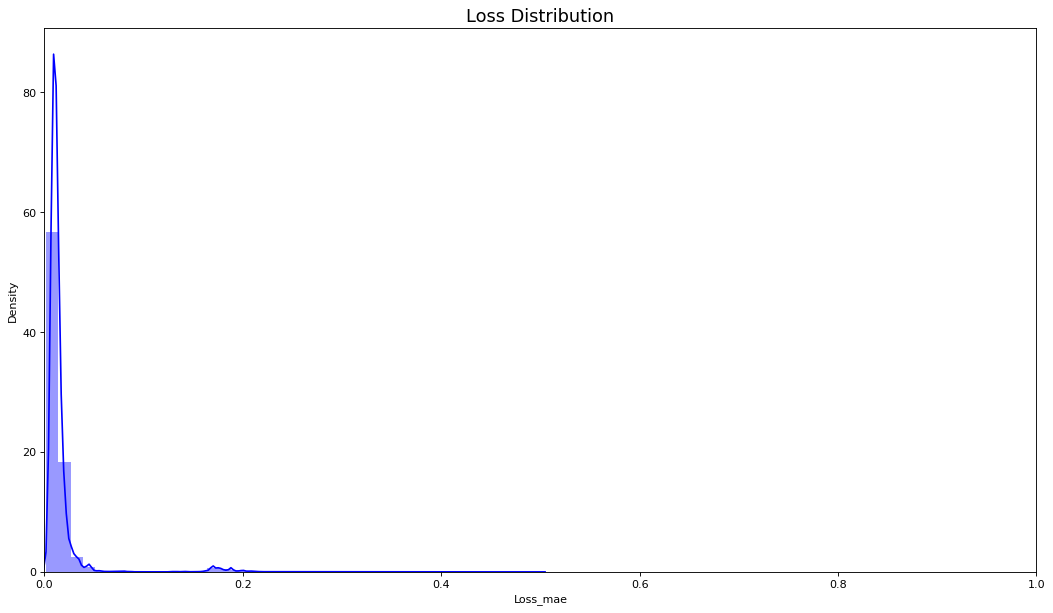

In [32]:
scored = pd.DataFrame(index=X_Norm.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_train), axis = 1)
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution', fontsize=16)
sns.distplot(scored['Loss_mae'], bins = 40, kde= True, color = 'blue');
plt.xlim([0.0,1.0])

In [33]:
X_pred = model.predict(X_test, verbose=1)

32768/32768 [==============================] - 81s 2ms/step


In [34]:
X_test=np.array(X_test)
X_test.shape

(1048576, 5)

In [35]:
X_test.shape=(1048576, features,1)
X_test.shape

(1048576, 5, 1)

C:\Users\glowi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 2.0)

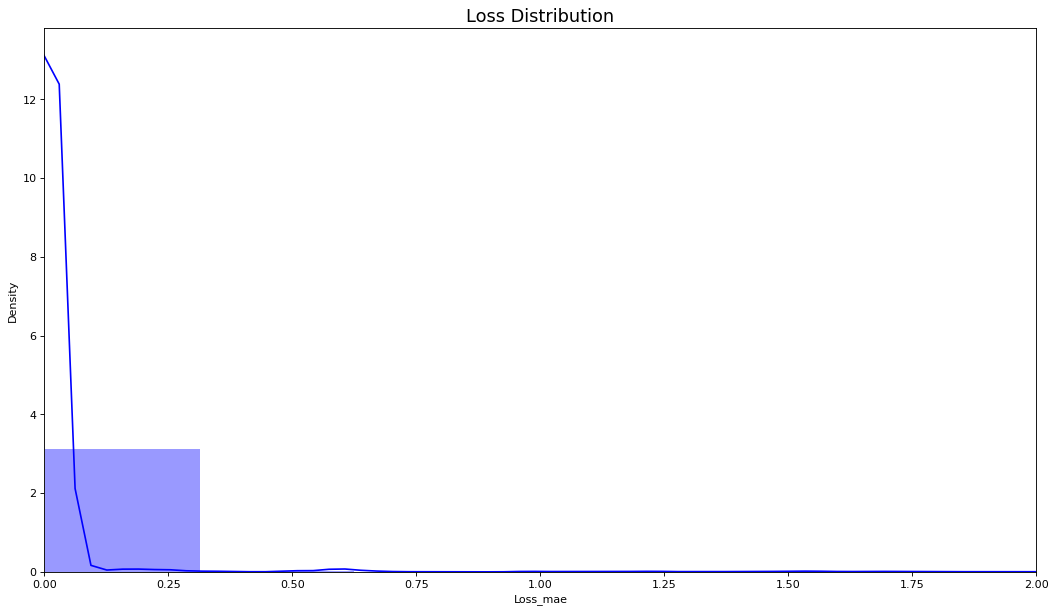

In [36]:
scored = pd.DataFrame(index=X_cav.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_test), axis = 1)
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution', fontsize=16)
sns.distplot(scored['Loss_mae'], bins = 20, kde= True, color = 'blue');
plt.xlim([0.0,2])

C:\Users\glowi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 0.25)

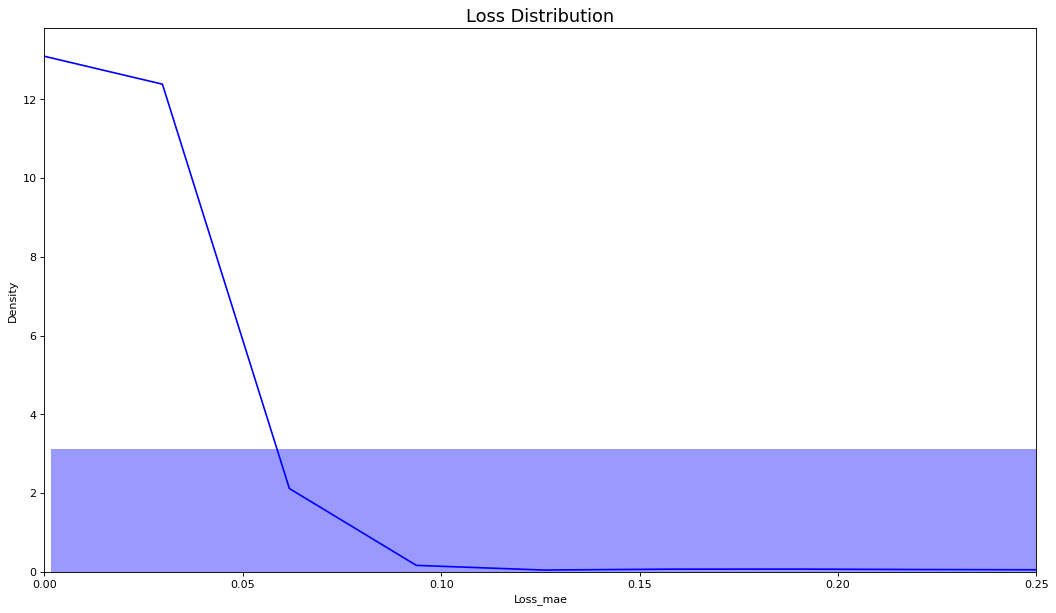

In [37]:
scored = pd.DataFrame(index=X_cav.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_test), axis = 1)
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution', fontsize=16)
sns.distplot(scored['Loss_mae'], bins = 20, kde= True, color = 'blue');
plt.xlim([0,0.25])

In [38]:
# calculate the loss on the test set
test_mae_loss = np.mean(np.abs(X_pred-X_test), axis = 1)
threshold=0.15

In [39]:
test_mae_loss.shape

(1048576, 1)

In [40]:
test_score_df = X_cav
test_score_df['loss'] = test_mae_loss
test_score_df['threshold'] = threshold
test_score_df['anomaly'] = test_score_df['loss'] > test_score_df['threshold']


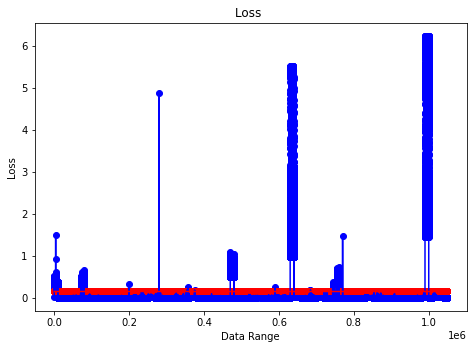

In [41]:
fig=plt.figure()
plt.rcParams["figure.figsize"] = (12,12)
ax=fig.add_axes([0,0,1,1])
ax.scatter(x=test_score_df.index, y=test_score_df['loss'],color='b')
ax.scatter(x=test_score_df.index, y=test_score_df['threshold'], color='r')
ax.plot(test_score_df.index, test_score_df['loss'], color='b')
ax.plot(test_score_df.index, test_score_df['threshold'], color='r')
ax.set_xlabel('Data Range')
ax.set_ylabel('Loss')
ax.set_title('Loss ')
plt.show()

In [42]:
test_score_df

,P out bar,P in bar,Q L/M,Dynamic Pressure,H,Time,loss,threshold,anomaly
0,2.654498,-2.256242,-0.665647,-0.665647,-2.256242,0.000000,0.014662,0.15,False
1,6.477165,0.816141,-0.389844,-0.389844,0.816141,0.000098,0.257190,0.15,True
2,6.314395,0.947824,-0.440142,-0.440142,0.947824,0.000195,0.241484,0.15,True
3,6.760710,0.586748,-0.302223,-0.302223,0.586748,0.000293,0.242387,0.15,True
4,5.886511,1.293990,-0.572366,-0.572366,1.293990,0.000391,0.198455,0.15,True
...,...,...,...,...,...,...,...,...,...
1048571,1.181810,-1.119986,0.218008,0.218008,-1.119986,102.399512,0.011486,0.15,False
1048572,0.462503,-0.538054,-0.004271,-0.004271,-0.538054,102.399609,0.009438,0.15,False
1048573,0.730292,-0.754700,0.078481,0.078481,-0.754700,102.399707,0.009480,0.15,False
1048574,1.110978,-1.062682,0.196119,0.196119,-1.062682,102.399805,0.011459,0.15,False


In [43]:
test_score_df["anomaly"][1]

True

In [44]:
anomalies=test_score_df


In [45]:
anomalies=anomalies.drop(anomalies.index[anomalies["anomaly"] ==False])
anomalies

,P out bar,P in bar,Q L/M,Dynamic Pressure,H,Time,loss,threshold,anomaly
1,6.477165,0.816141,-0.389844,-0.389844,0.816141,0.000098,0.257190,0.15,True
2,6.314395,0.947824,-0.440142,-0.440142,0.947824,0.000195,0.241484,0.15,True
3,6.760710,0.586748,-0.302223,-0.302223,0.586748,0.000293,0.242387,0.15,True
4,5.886511,1.293990,-0.572366,-0.572366,1.293990,0.000391,0.198455,0.15,True
5,6.584858,0.729015,-0.356564,-0.356564,0.729015,0.000488,0.252365,0.15,True
...,...,...,...,...,...,...,...,...,...
999995,-10.668763,-7.098123,0.068420,0.068420,-7.098123,97.655762,2.373269,0.15,True
999996,-10.025564,-7.618482,0.267179,0.267179,-7.618482,97.655859,2.976367,0.15,True
999997,-10.823654,-6.972813,0.020556,0.020556,-6.972813,97.655957,1.890300,0.15,True
999998,-10.311711,-7.386984,0.178755,0.178755,-7.386984,97.656055,2.761467,0.15,True


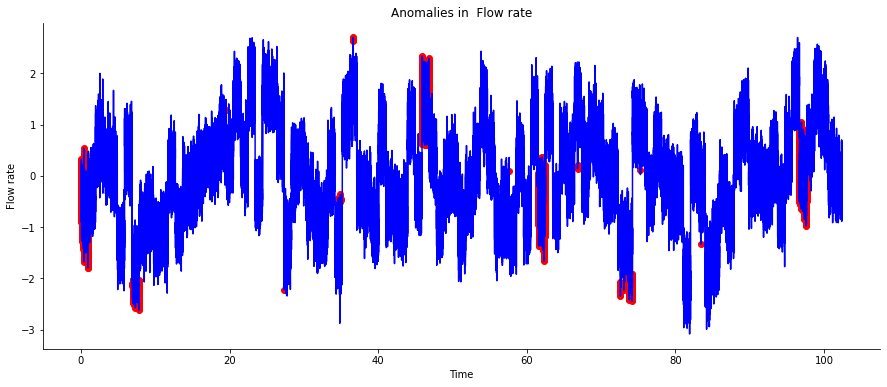

In [46]:
fig, ax = plt.subplots(figsize=(15,6))


ax.plot(test_score_df['Time '], test_score_df['Q  L/M'], color='blue')
ax.scatter(anomalies['Time '], anomalies['Q  L/M'], color='red')
sb.despine()
plt.title("Anomalies in  Flow rate")
plt.xlabel("Time")
plt.ylabel("Flow rate")

plt.show()

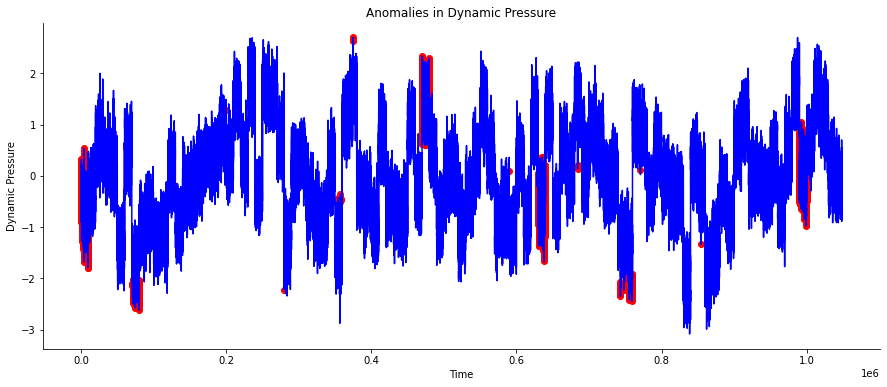

In [47]:
fig, ax = plt.subplots(figsize=(15,6))


ax.plot(test_score_df.index, test_score_df['Dynamic Pressure'], color='blue')
ax.scatter(anomalies.index, anomalies['Dynamic Pressure'], color='red')
sb.despine()
plt.title("Anomalies in Dynamic Pressure")
plt.xlabel("Time")
plt.ylabel("Dynamic Pressure")
plt.show()

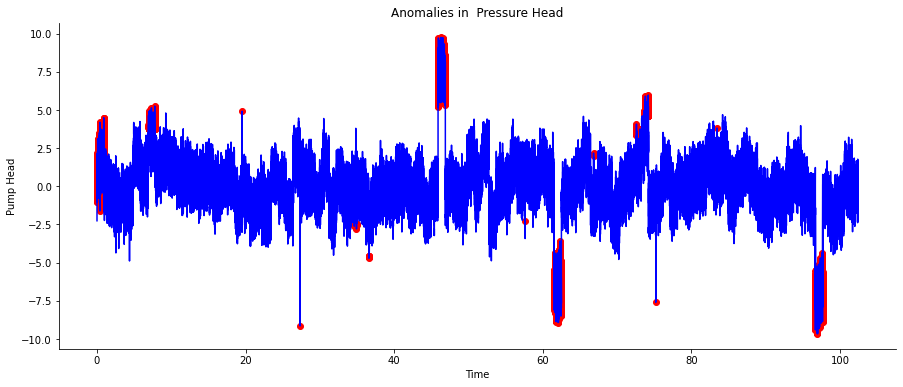

In [48]:
fig, ax = plt.subplots(figsize=(15,6))


ax.plot(test_score_df['Time '], test_score_df['H'], color='blue')
ax.scatter(anomalies['Time '], anomalies['H'], color='red')
sb.despine()
plt.title("Anomalies in  Pressure Head")
plt.xlabel("Time")
plt.ylabel("Pump Head")

plt.show()

In [49]:
model.save("GRU01_DP_frequency")


INFO:tensorflow:Assets written to: GRU01_DP_frequency\assets


# Vibration


In [50]:
Normal_Vib=pd.read_csv("Normal_Vib.csv")

In [51]:
Normal_Vib=Normal_Vib.drop(columns=['Unnamed: 0'])
Normal_Vib

,Time,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H
0,0.000000,1.161289,-0.084085,49.443383,0.897711,0.374315,1.245374
1,0.000098,1.161289,-0.084085,49.443383,-0.612374,1.983866,1.245374
2,0.000195,1.161289,-0.084085,49.443383,-0.699269,2.101856,1.245374
3,0.000293,1.161289,-0.084085,49.443383,1.121377,1.053456,1.245374
4,0.000391,1.161289,-0.084085,49.443383,-0.672813,-2.743689,1.245374
...,...,...,...,...,...,...,...
919995,89.843262,0.593152,-0.090887,49.371344,-1.833754,-1.940224,0.684039
919996,89.843359,0.593152,-0.090887,49.371344,1.000499,1.311315,0.684039
919997,89.843457,0.593152,-0.090887,49.371344,-0.302599,0.097853,0.684039
919998,89.843555,0.593152,-0.090887,49.371344,-1.227691,3.129577,0.684039


In [52]:
Normal_Vibx=Normal_Vib
Normal_Vib=Normal_Vibx.drop(columns=['Time '])
Normal_Vib

,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H
0,1.161289,-0.084085,49.443383,0.897711,0.374315,1.245374
1,1.161289,-0.084085,49.443383,-0.612374,1.983866,1.245374
2,1.161289,-0.084085,49.443383,-0.699269,2.101856,1.245374
3,1.161289,-0.084085,49.443383,1.121377,1.053456,1.245374
4,1.161289,-0.084085,49.443383,-0.672813,-2.743689,1.245374
...,...,...,...,...,...,...
919995,0.593152,-0.090887,49.371344,-1.833754,-1.940224,0.684039
919996,0.593152,-0.090887,49.371344,1.000499,1.311315,0.684039
919997,0.593152,-0.090887,49.371344,-0.302599,0.097853,0.684039
919998,0.593152,-0.090887,49.371344,-1.227691,3.129577,0.684039


In [53]:
#Normalizing the data
for col in Normal_Vib:
    Normal_Vib[col] = (Normal_Vib[col]-Normal_Vib[col].min())/(Normal_Vib[col].max()-Normal_Vib[col].min())

In [54]:
Cavitation_Vib=pd.read_csv("Cavitation_Vib.csv")
Cavitation_Vib=Cavitation_Vib.drop(columns=['Unnamed: 0'])
Cavitation_Vib

,Time,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H
0,0.000000,0.165204,-0.616328,27.839285,0.283178,-0.124765,0.781532
1,0.000098,0.371800,-0.616328,27.839285,-0.120759,-0.894264,0.988128
2,0.000195,0.371800,-0.616328,27.839285,0.331279,0.257127,0.988128
3,0.000293,0.371800,-0.616328,27.839285,0.509145,-0.061347,0.988128
4,0.000391,0.371800,-0.616328,27.839285,0.419741,-1.516285,0.988128
...,...,...,...,...,...,...,...
1048571,102.399512,0.215623,-0.624159,27.789128,-0.415425,-0.193316,0.839782
1048572,102.399609,0.215623,-0.624159,27.789128,-0.075482,0.310897,0.839782
1048573,102.399707,0.215623,-0.624159,27.789128,0.161987,0.578513,0.839782
1048574,102.399805,0.215623,-0.624159,27.789128,-0.611381,0.048815,0.839782


In [55]:
Cavitation_Vibx=Cavitation_Vib
Cavitation_Vib=Cavitation_Vib.drop(columns=['Time '])
Cavitation_Vib

,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H
0,0.165204,-0.616328,27.839285,0.283178,-0.124765,0.781532
1,0.371800,-0.616328,27.839285,-0.120759,-0.894264,0.988128
2,0.371800,-0.616328,27.839285,0.331279,0.257127,0.988128
3,0.371800,-0.616328,27.839285,0.509145,-0.061347,0.988128
4,0.371800,-0.616328,27.839285,0.419741,-1.516285,0.988128
...,...,...,...,...,...,...
1048571,0.215623,-0.624159,27.789128,-0.415425,-0.193316,0.839782
1048572,0.215623,-0.624159,27.789128,-0.075482,0.310897,0.839782
1048573,0.215623,-0.624159,27.789128,0.161987,0.578513,0.839782
1048574,0.215623,-0.624159,27.789128,-0.611381,0.048815,0.839782


In [56]:
#Normalizing the data
for col in Cavitation_Vib:
    Cavitation_Vib[col] = (Cavitation_Vib[col]-Cavitation_Vib[col].min())/(Cavitation_Vib[col].max()-Cavitation_Vib[col].min())

In [57]:
scaler = StandardScaler()

scaler.fit(Normal_Vib)
Normal_Vib = scaler.transform(Normal_Vib)

scaler.fit(Cavitation_Vib)
Cavitation_Vib = scaler.transform(Cavitation_Vib)


In [58]:
df=Normal_Vib
Cavdf=Cavitation_Vib


In [59]:
df = pd.DataFrame(df, columns =[ 'P out bar', 'P in bar', 'Q  L/M', 'Vibration 1','Vibration 2','H'])
Cavdf = pd.DataFrame(Cavdf, columns =['P out bar', 'P in bar', 'Q  L/M', 'Vibration 1','Vibration 2','H'])


In [60]:
X_Norm = fft(df)
N = len(df)
n = np.arange(N)
sr = 1 / (60*60)
T = N/sr
freq = n/T 
# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

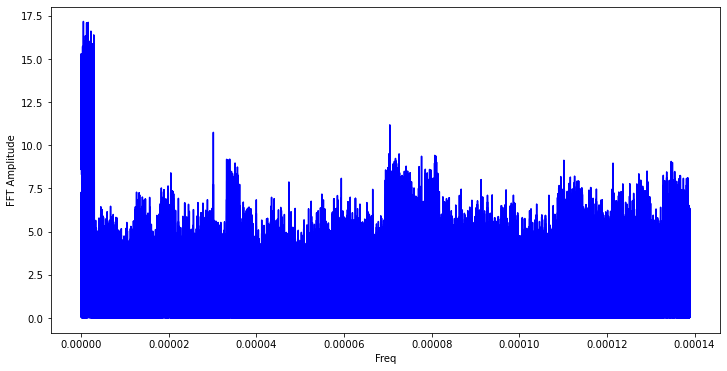

In [61]:
plt.figure(figsize = (12, 6))
plt.plot(f_oneside, np.abs(X_Norm[:n_oneside]), 'b')
plt.xlabel('Freq')
plt.ylabel('FFT Amplitude')
plt.show()

In [62]:
X_cav = fft(Cavdf)
N = len(Cavdf)
n = np.arange(N)
sr = 1 / (60*60)
T = N/sr
freq = n/T 
# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

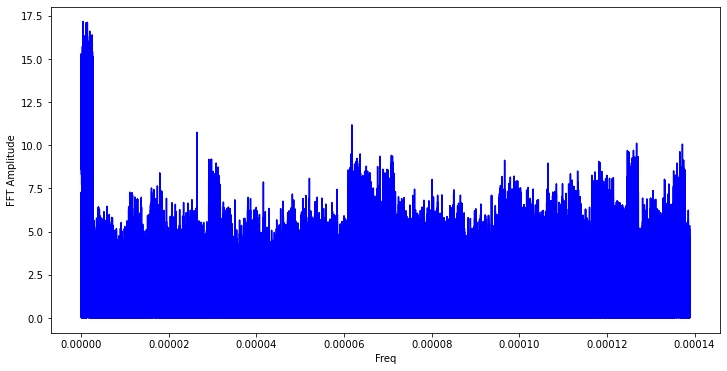

In [63]:
plt.figure(figsize = (12, 6))
plt.plot(f_oneside, np.abs(X_Norm[:n_oneside]), 'b')
plt.xlabel('Freq')
plt.ylabel('FFT Amplitude')
plt.show()

In [64]:
X_Norm = X_Norm.real.astype(np.float32)
X_cav = X_cav.real.astype(np.float32)

In [65]:
X_Norm = pd.DataFrame(X_Norm, columns =[ 'P out bar', 'P in bar', 'Q  L/M', 'Vibration 1','Vibration 2','H'])
X_cav = pd.DataFrame(X_cav, columns =[ 'P out bar', 'P in bar', 'Q  L/M', 'Vibration 1','Vibration 2','H'])


In [66]:
X_Norm['Time ']=Normal_Vibx['Time ']
X_Norm

,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H,Time
0,12.398434,9.071866,3.723394,-2.399124,3.723394,9.071866,0.000000
1,12.142680,9.773993,2.128517,-0.357873,2.128517,9.773993,0.000098
2,12.142035,9.807361,2.029707,-0.226340,2.029707,9.807361,0.000195
3,12.945234,8.713410,3.705159,-2.192544,3.705159,8.713410,0.000293
4,9.474541,11.131047,3.393636,-2.934078,3.393636,11.131047,0.000391
...,...,...,...,...,...,...,...
919995,-4.213120,2.982512,0.674927,-0.464332,0.674927,2.982512,89.843262
919996,-0.254025,-0.074837,1.928787,-0.816447,1.928787,-0.074837,89.843359
919997,-1.918158,1.252768,1.274237,-0.498425,1.274237,1.252768,89.843457
919998,-0.940173,1.115567,-0.270130,1.886726,-0.270130,1.115567,89.843555


In [67]:
X_cav['Time ']=Cavitation_Vibx['Time ']
X_cav

,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H,Time
0,1.778136,-1.118543,-1.223256,-0.921674,-1.223256,-1.118543,0.000000
1,4.734303,2.973048,-0.457219,-0.970248,-0.457219,2.973048,0.000098
2,6.387003,1.806649,-0.263424,-0.677741,-0.263424,1.806649,0.000195
3,6.385583,1.673558,0.138688,-1.214364,0.138688,1.673558,0.000293
4,5.022058,2.422576,0.618687,-2.308871,0.618687,2.422576,0.000391
...,...,...,...,...,...,...,...
1048571,-0.435910,0.404058,-0.922678,0.726574,-0.922678,0.404058,102.399512
1048572,0.501458,-0.320350,-0.624189,0.641045,-0.624189,-0.320350,102.399609
1048573,1.084794,-0.790656,-0.379945,0.509830,-0.379945,-0.790656,102.399707
1048574,-0.526195,0.596610,-1.319763,1.225925,-1.319763,0.596610,102.399805


In [68]:
X_train=X_Norm

In [69]:
X_train=X_train.drop(columns=['Time '])

In [70]:
X_train

,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H
0,12.398434,9.071866,3.723394,-2.399124,3.723394,9.071866
1,12.142680,9.773993,2.128517,-0.357873,2.128517,9.773993
2,12.142035,9.807361,2.029707,-0.226340,2.029707,9.807361
3,12.945234,8.713410,3.705159,-2.192544,3.705159,8.713410
4,9.474541,11.131047,3.393636,-2.934078,3.393636,11.131047
...,...,...,...,...,...,...
919995,-4.213120,2.982512,0.674927,-0.464332,0.674927,2.982512
919996,-0.254025,-0.074837,1.928787,-0.816447,1.928787,-0.074837
919997,-1.918158,1.252768,1.274237,-0.498425,1.274237,1.252768
919998,-0.940173,1.115567,-0.270130,1.886726,-0.270130,1.115567


In [71]:
X_train=np.array(X_train)


In [72]:
timesteps=X_train.shape[0]
features=X_train.shape[1]


In [73]:
X_train.shape=(timesteps,features,1)
X_train.shape

(920000, 6, 1)

In [79]:
#Starting the LSTM model
model = keras.Sequential()

model.add(layers.GRU(36, activation='relu', return_sequences=True, kernel_regularizer=regularizers.l2(0.00)))
model.add(keras.layers.Activation('relu'))
model.add(layers.BatchNormalization())

model.add(layers.GRU(6, activation='relu', return_sequences=False))
model.add(layers.BatchNormalization())

model.add(layers.RepeatVector(features))

model.add(layers.GRU(6, activation='relu', return_sequences=True))
model.add(layers.BatchNormalization())

model.add(layers.GRU(36, activation='relu', return_sequences=True))
model.add(layers.BatchNormalization())

model.add(layers.TimeDistributed(Dense(X_train.shape[2])))

model.compile(optimizer='adam', loss='mae')



In [80]:
X_test=X_cav

In [81]:
X_test=X_test.drop(columns=['Time '])

In [82]:
X_test.shape

(1048576, 6)

In [83]:
model.fit(X_train, X_train, epochs=150, batch_size=512, validation_data=(X_test, X_test))

Epoch 1/150
1797/1797 [==============================] - 48s 23ms/step - loss: 0.4514 - val_loss: 0.1905
Epoch 2/150
1797/1797 [==============================] - 42s 23ms/step - loss: 0.1290 - val_loss: 0.1238
Epoch 3/150
1797/1797 [==============================] - 39s 22ms/step - loss: 0.1163 - val_loss: 0.0973
Epoch 4/150
1797/1797 [==============================] - 41s 23ms/step - loss: 0.1081 - val_loss: 0.1115
Epoch 5/150
1797/1797 [==============================] - 39s 22ms/step - loss: 0.1062 - val_loss: 0.1055
Epoch 6/150
1797/1797 [==============================] - 41s 23ms/step - loss: 0.1038 - val_loss: 0.0839
Epoch 7/150
1797/1797 [==============================] - 40s 22ms/step - loss: 0.0994 - val_loss: 0.0990
Epoch 8/150
1797/1797 [==============================] - 43s 24ms/step - loss: 0.0996 - val_loss: 0.1306
Epoch 9/150
1797/1797 [==============================] - 42s 24ms/step - loss: 0.0975 - val_loss: 0.0864
Epoch 10/150
1797/1797 [==============================]

1797/1797 [==============================] - 43s 24ms/step - loss: 0.0591 - val_loss: 0.0685
Epoch 79/150
1797/1797 [==============================] - 44s 25ms/step - loss: 0.0593 - val_loss: 0.0674
Epoch 80/150
1797/1797 [==============================] - 43s 24ms/step - loss: 0.0580 - val_loss: 0.0818
Epoch 81/150
1797/1797 [==============================] - 44s 25ms/step - loss: 0.0570 - val_loss: 0.0747
Epoch 82/150
1797/1797 [==============================] - 43s 24ms/step - loss: 0.0575 - val_loss: 0.0703
Epoch 83/150
1797/1797 [==============================] - 45s 25ms/step - loss: 0.0572 - val_loss: 0.0698
Epoch 84/150
1797/1797 [==============================] - 43s 24ms/step - loss: 0.0569 - val_loss: 0.0695
Epoch 85/150
1797/1797 [==============================] - 45s 25ms/step - loss: 0.0568 - val_loss: 0.0703
Epoch 86/150
1797/1797 [==============================] - 43s 24ms/step - loss: 0.0574 - val_loss: 0.0794
Epoch 87/150
1797/1797 [==============================] - 4

In [84]:
X_pred = model.predict(X_train, verbose=1)

28750/28750 [==============================] - 71s 2ms/step


C:\Users\glowi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 1.0)

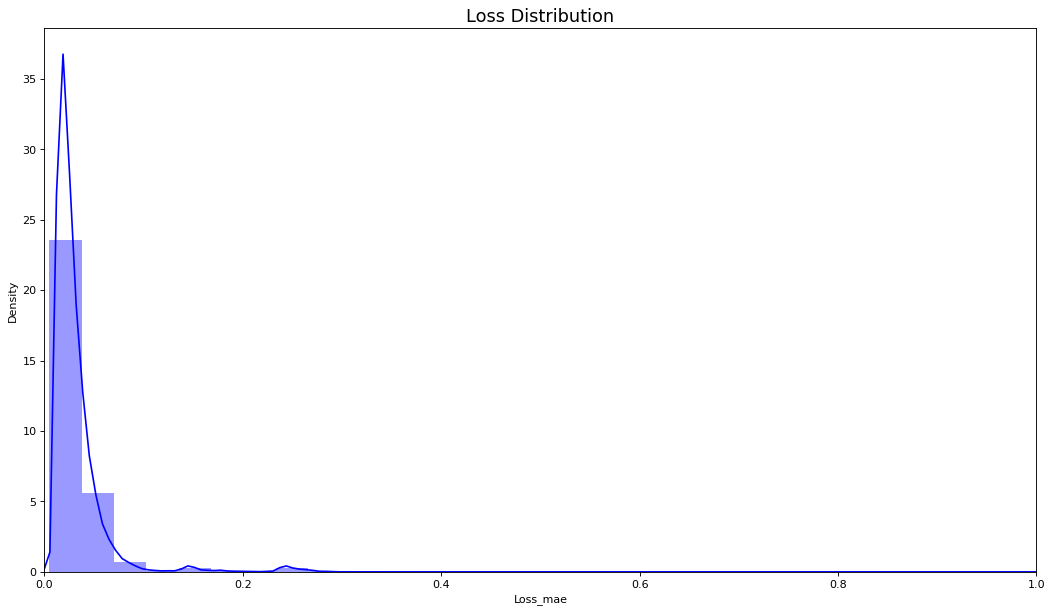

In [85]:
scored = pd.DataFrame(index=X_Norm.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_train), axis = 1)
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution', fontsize=16)
sns.distplot(scored['Loss_mae'], bins = 40, kde= True, color = 'blue');
plt.xlim([0.0,1.0])

In [86]:
X_pred = model.predict(X_test, verbose=1)

32768/32768 [==============================] - 91s 3ms/step


In [87]:
X_test=np.array(X_test)
X_test.shape=(1048576, features,1)
X_test.shape

(1048576, 6, 1)

C:\Users\glowi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 2.0)

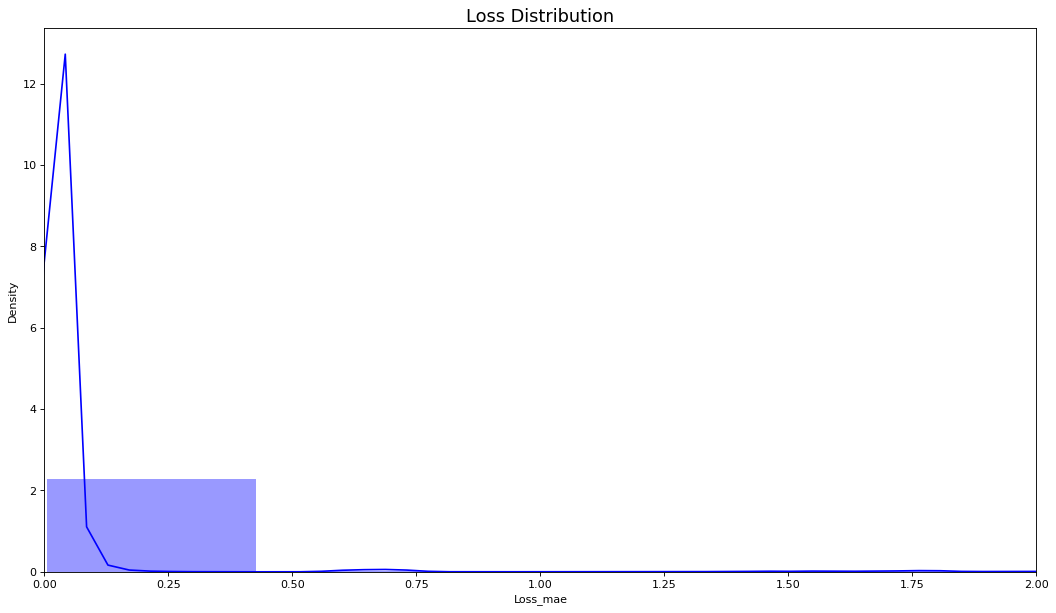

In [88]:
scored = pd.DataFrame(index=X_cav.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_test), axis = 1)
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution', fontsize=16)
sns.distplot(scored['Loss_mae'], bins = 20, kde= True, color = 'blue');
plt.xlim([0.0,2])

C:\Users\glowi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 0.5)

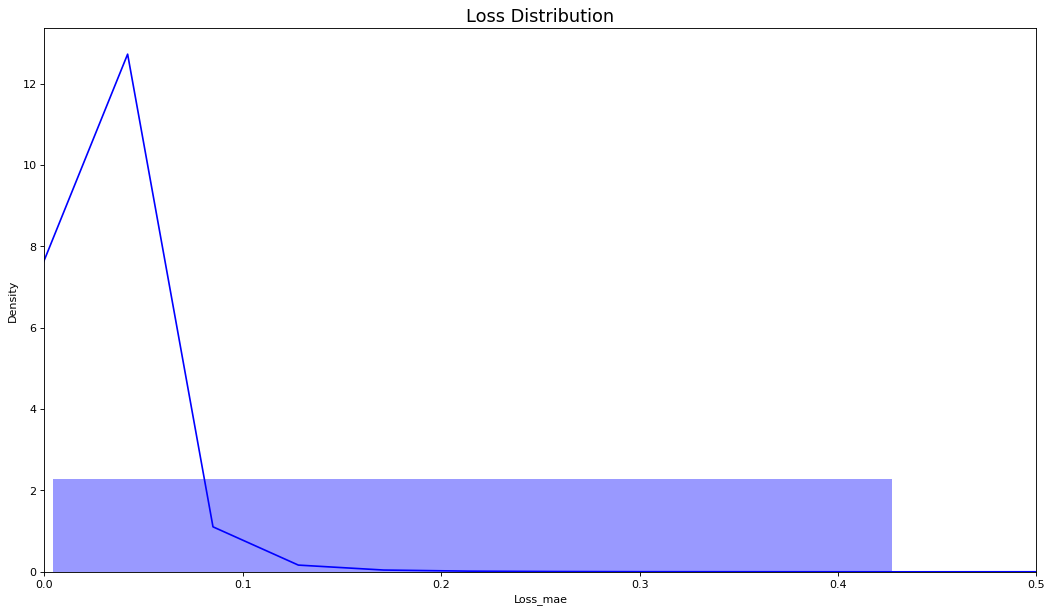

In [90]:
scored = pd.DataFrame(index=X_cav.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_test), axis = 1)
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution', fontsize=16)
sns.distplot(scored['Loss_mae'], bins = 20, kde= True, color = 'blue');
plt.xlim([0.0,0.5])

In [107]:
# calculate the loss on the test set
test_mae_loss = np.mean(np.abs(X_pred-X_test), axis = 1)
threshold=0.4

In [108]:
test_mae_loss.shape

(1048576, 1)

In [109]:
test_score_df = X_cav
test_score_df['loss'] = test_mae_loss
test_score_df['threshold'] = threshold
test_score_df['anomaly'] = test_score_df['loss'] > test_score_df['threshold']


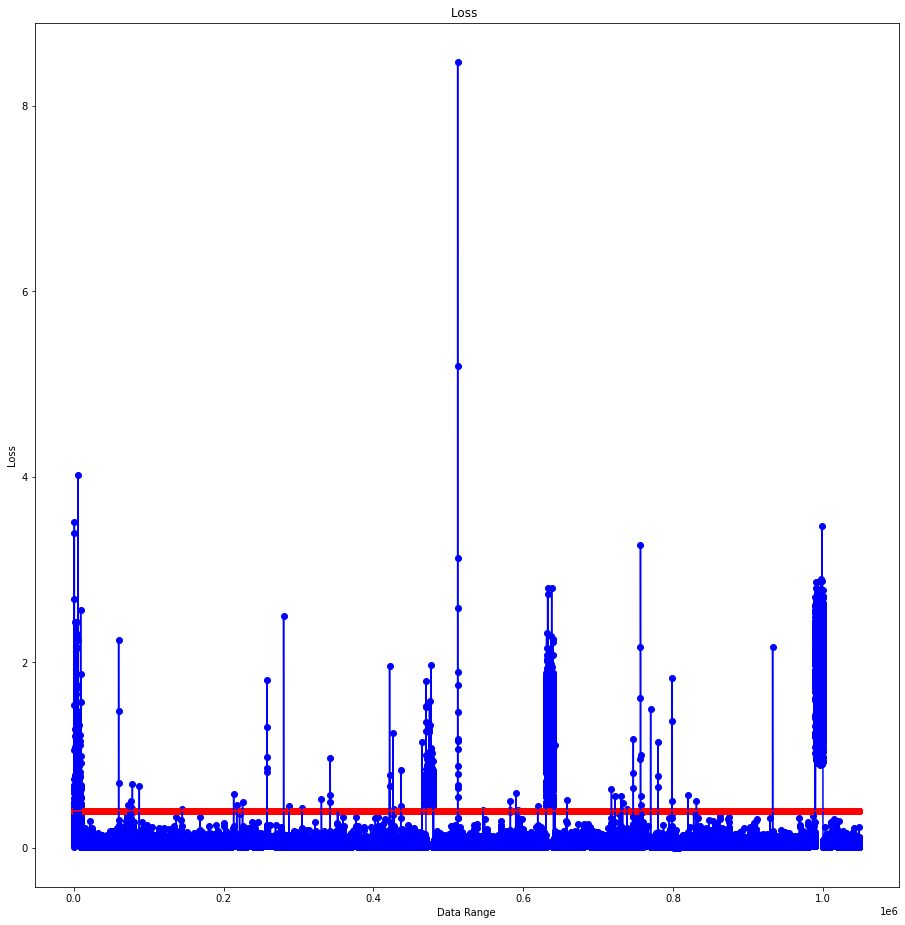

In [110]:
fig=plt.figure()
plt.rcParams["figure.figsize"] = (12,12)
ax=fig.add_axes([0,0,1,1])
ax.scatter(x=test_score_df.index, y=test_score_df['loss'],color='b')
ax.scatter(x=test_score_df.index, y=test_score_df['threshold'], color='r')
ax.plot(test_score_df.index, test_score_df['loss'], color='b')
ax.plot(test_score_df.index, test_score_df['threshold'], color='r')
ax.set_xlabel('Data Range')
ax.set_ylabel('Loss')
ax.set_title('Loss ')
plt.show()

In [111]:
test_score_df

,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H,Time,loss,threshold,anomaly
0,1.778136,-1.118543,-1.223256,-0.921674,-1.223256,-1.118543,0.000000,0.013582,0.4,False
1,4.734303,2.973048,-0.457219,-0.970248,-0.457219,2.973048,0.000098,0.122803,0.4,False
2,6.387003,1.806649,-0.263424,-0.677741,-0.263424,1.806649,0.000195,0.119584,0.4,False
3,6.385583,1.673558,0.138688,-1.214364,0.138688,1.673558,0.000293,0.135220,0.4,False
4,5.022058,2.422576,0.618687,-2.308871,0.618687,2.422576,0.000391,0.090382,0.4,False
...,...,...,...,...,...,...,...,...,...,...
1048571,-0.435910,0.404058,-0.922678,0.726574,-0.922678,0.404058,102.399512,0.019989,0.4,False
1048572,0.501458,-0.320350,-0.624189,0.641045,-0.624189,-0.320350,102.399609,0.013685,0.4,False
1048573,1.084794,-0.790656,-0.379945,0.509830,-0.379945,-0.790656,102.399707,0.015432,0.4,False
1048574,-0.526195,0.596610,-1.319763,1.225925,-1.319763,0.596610,102.399805,0.023609,0.4,False


In [112]:
test_score_df["anomaly"][1]

False

In [113]:
anomalies=test_score_df


In [114]:
anomalies=anomalies.drop(anomalies.index[anomalies["anomaly"] ==False])
anomalies

,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H,Time,loss,threshold,anomaly
85,1.740791,6.136927,-3.961834,2.704735,-3.961834,6.136927,0.008301,1.540670,0.4,True
88,2.768191,5.333757,-3.607126,2.574257,-3.607126,5.333757,0.008594,0.589805,0.4,True
97,7.456186,0.043386,2.887998,-4.523242,2.887998,0.043386,0.009473,0.406586,0.4,True
195,2.915182,5.310684,-3.831885,2.922933,-3.831885,5.310684,0.019043,0.642927,0.4,True
227,3.851638,4.686748,-3.832989,3.236557,-3.832989,4.686748,0.022168,0.473995,0.4,True
...,...,...,...,...,...,...,...,...,...,...
999995,-10.563621,-7.574162,-4.023697,4.085535,-4.023697,-7.574162,97.655762,2.436083,0.4,True
999996,-11.829007,-6.804010,-3.803379,3.369981,-3.803379,-6.804010,97.655859,1.557870,0.4,True
999997,-13.487304,-6.046403,-2.759607,1.425520,-2.759607,-6.046403,97.655957,2.400701,0.4,True
999998,-11.981505,-7.325972,-1.932497,0.824640,-1.932497,-7.325972,97.656055,2.157345,0.4,True


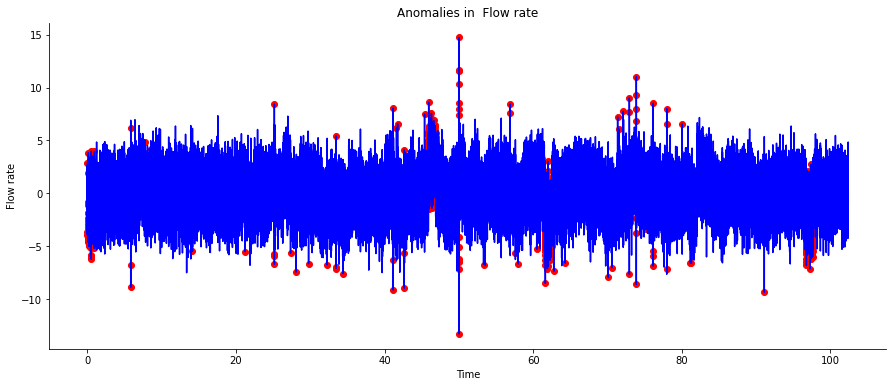

In [115]:
fig, ax = plt.subplots(figsize=(15,6))


ax.plot(test_score_df['Time '], test_score_df['Q  L/M'], color='blue')
ax.scatter(anomalies['Time '], anomalies['Q  L/M'], color='red')
sb.despine()
plt.title("Anomalies in  Flow rate")
plt.xlabel("Time")
plt.ylabel("Flow rate")

plt.show()

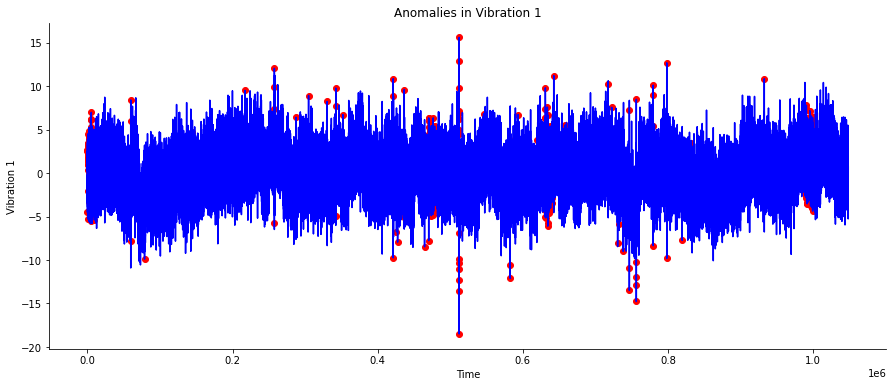

In [116]:
fig, ax = plt.subplots(figsize=(15,6))


ax.plot(test_score_df.index, test_score_df['Vibration 1'], color='blue')
ax.scatter(anomalies.index, anomalies['Vibration 1'], color='red')
sb.despine()
plt.title("Anomalies in Vibration 1")
plt.xlabel("Time")
plt.ylabel("Vibration 1")
plt.show()

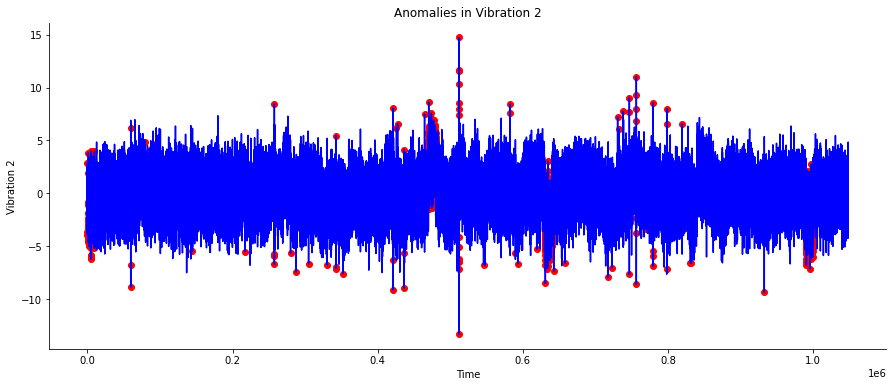

In [117]:
fig, ax = plt.subplots(figsize=(15,6))


ax.plot(test_score_df.index, test_score_df['Vibration 2'], color='blue')
ax.scatter(anomalies.index, anomalies['Vibration 2'], color='red')
sb.despine()
plt.title("Anomalies in Vibration 2")
plt.xlabel("Time")
plt.ylabel("Vibration 2")
plt.show()

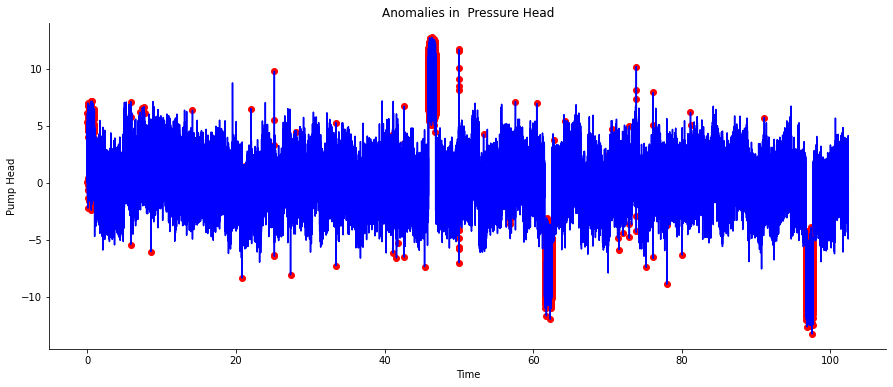

In [119]:
fig, ax = plt.subplots(figsize=(15,6))


ax.plot(test_score_df['Time '], test_score_df['H'], color='blue')
ax.scatter(anomalies['Time '], anomalies['H'], color='red')
sb.despine()
plt.title("Anomalies in  Pressure Head")
plt.xlabel("Time")
plt.ylabel("Pump Head")

plt.show()

In [118]:
model.save("GRU01_Vib_frequency")


INFO:tensorflow:Assets written to: GRU01_Vib_frequency\assets


INFO:tensorflow:Assets written to: GRU01_Vib_frequency\assets
